In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# https://archive.ics.uci.edu/ml/datasets/wine+quality


In [70]:
def show_correlation_graph(data, title=None, cmap=None, linewidths=0, figsize=(9, 6), annot=True):
    if cmap is None:
        cmap = sns.diverging_palette(10, 120, as_cmap=True)
    data = data.dropna()    
    corr = data.corr()
    for column_name in corr.columns:
        corr[column_name] = corr[column_name].abs()
    _, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(title)

    sns.heatmap(corr, annot=annot, fmt="2.2f", linewidths=linewidths, ax=ax, cmap=cmap)    

In [71]:
df = pd.read_csv("./data/wines.csv")

In [72]:
df.head()

,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


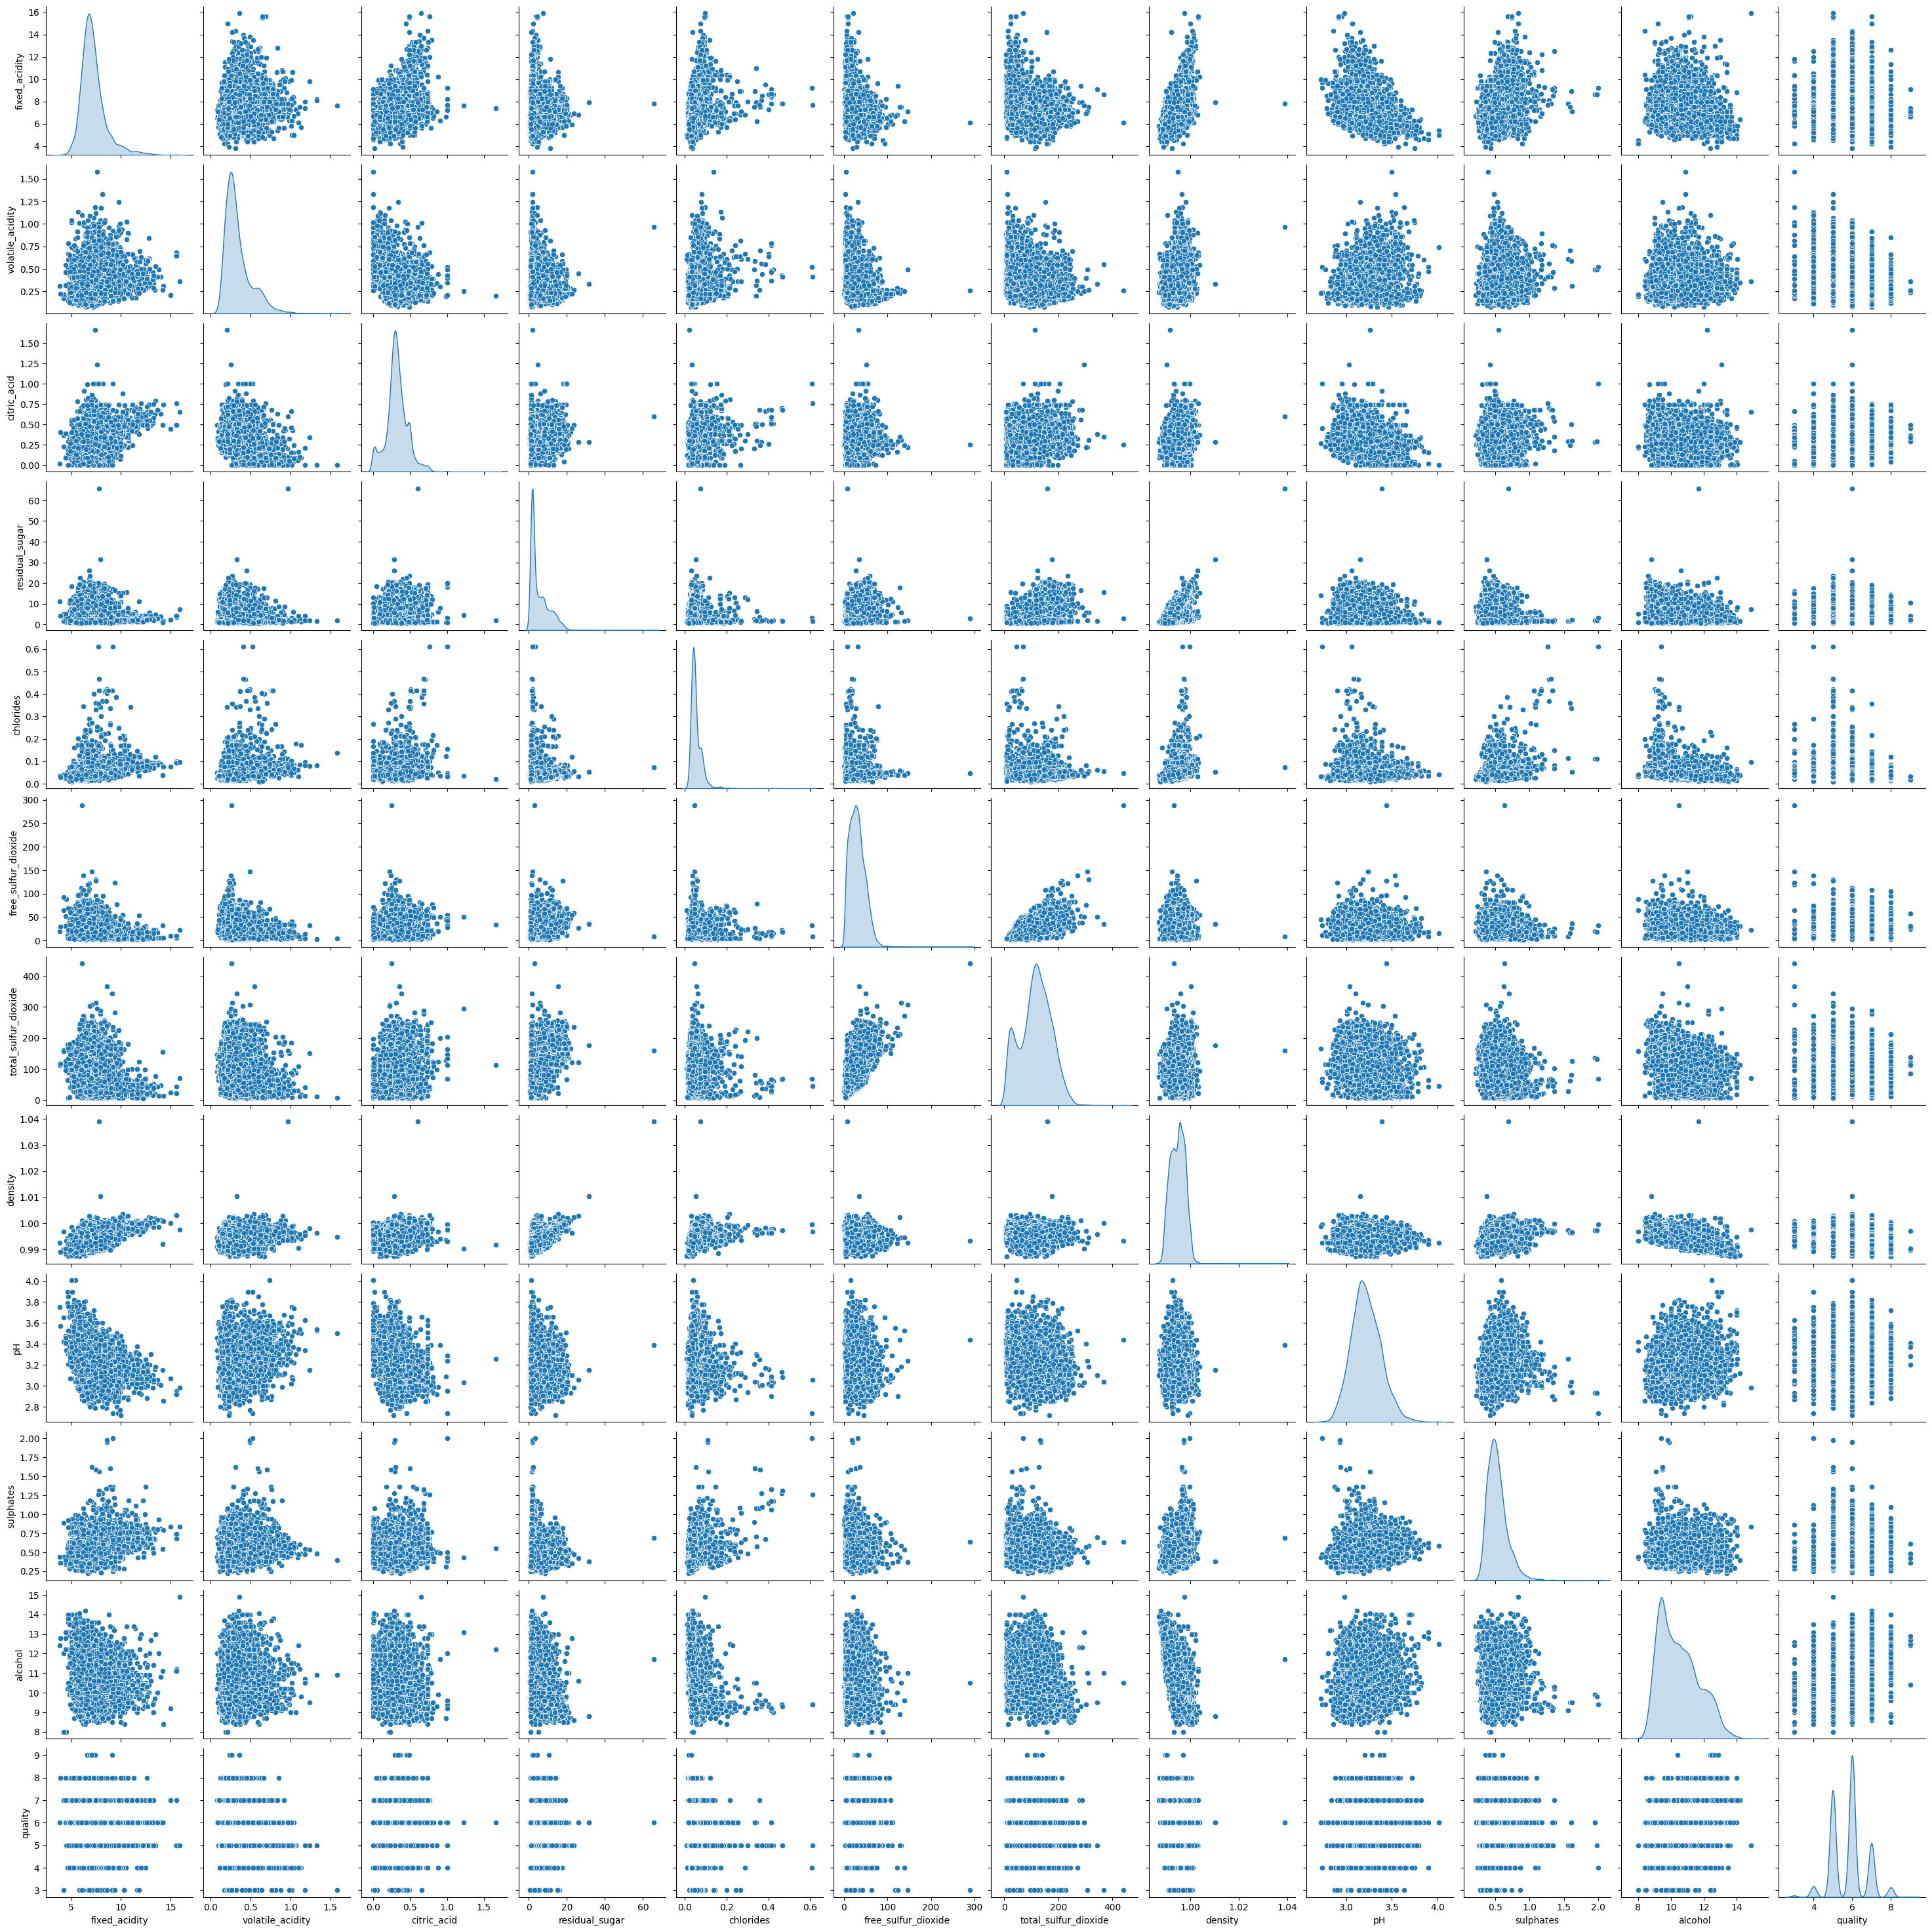

In [74]:
_ = sns.pairplot(df, diag_kind='kde')

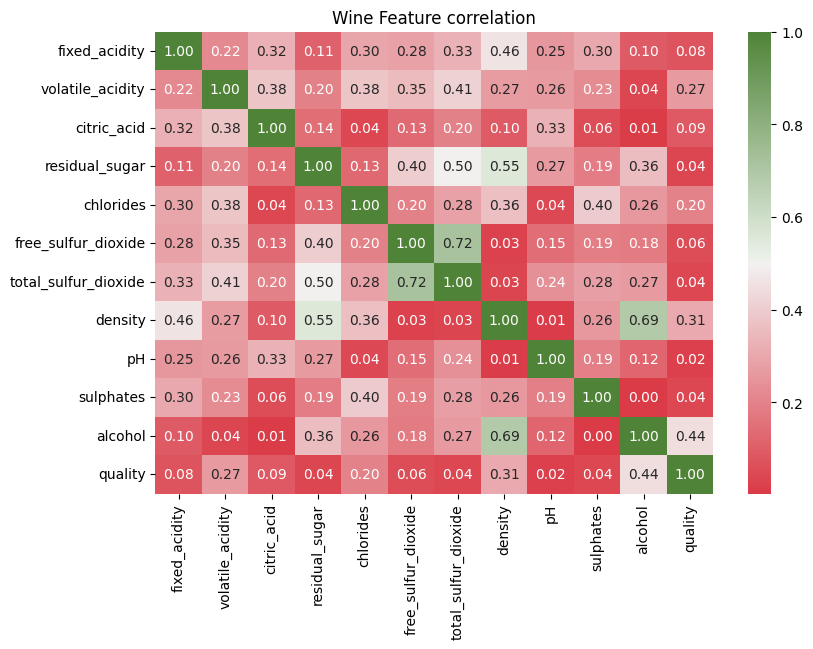

In [75]:
show_correlation_graph(df, title="Wine Feature correlation", cmap=None, linewidths=0, figsize=(9, 6), annot=True)

In [76]:
X = df.drop('color',axis= 1)
y = pd.DataFrame(X.pop("quality"))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [77]:
model = LinearRegression().fit( X_train, y_train)

In [78]:
predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
dataset = pd.DataFrame({'Predicted': predictions.reshape((len(predictions),)), 'Expected': y_test["quality"]  })
dataset["MSE"] = (dataset["Expected"] - dataset["Predicted"]) ** 2
dataset

mean_squared_error :  0.5336721195885842
mean_absolute_error :  0.5653209053122744


,Predicted,Expected,MSE
868,6.024318,6,0.000591
5097,5.710654,6,0.083721
5450,6.943859,7,0.003152
5850,5.758772,6,0.058191
2192,5.306633,5,0.094024
...,...,...,...
6040,6.403890,6,0.163128
2890,5.736508,6,0.069428
914,6.189523,6,0.035919
1403,6.073486,8,3.711456
